# Laptop Configuration and Price Analysis Case Study

## Context

Laptopia101 is an online laptop retailer with a wide range of products. Different types of customers have different requirements, and Laptopia101 wants to improve its website by including informative visuals regarding laptop configuration and prices to improve customer experience.

The original dataset can be viewed [here](https://www.kaggle.com/muhammetvarl/laptop-price).

## Objective

To answer some of the questions which will help us understand the kind of information and visuals Laptopia101 can put on their website to improve customer experience.


## Data Description

The data contains information about the model, manufacturer, price, and configuration of various laptops in the inventory of Laptopia101. The detailed data dictionary is given below.

**Data Dictionary**

- Company: Laptop Manufacturer
- Product: Brand and Model
- TypeName: Type (Notebook, Ultrabook, Gaming, etc.)
- Inches: Screen Size
- ScreenResolution: Screen Resolution
- Cpu: Central Processing Unit
- Ram: Laptop RAM
- Memory: Hard Disk / SSD Memory
- GPU: Graphics Processing Unit
- OpSys: Operating System
- Weight: Laptop Weight
- Price_euros: Price in euros

In [4]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [7]:
import chardet

file = "laptop_price.csv"
with open(file, "rb") as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

<IPython.core.display.Javascript object>

In [14]:
# loading the dataset
df = pd.read_csv("laptop_price.csv", engine="python", encoding="latin1")

<IPython.core.display.Javascript object>

In [15]:
# checking the shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 1303 rows and 13 columns.


<IPython.core.display.Javascript object>

In [16]:
# let's view a sample of the data
df.sample(n=10, random_state=1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
644,652,Acer,Extensa EX2540,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.4kg,450.00
1275,1293,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,729.00
163,167,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.5kg,1079.00
1008,1022,HP,ProBook 440,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.64kg,1049.26
909,922,LG,Gram 14Z970,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,0.98kg,1899.00
268,273,HP,Probook 470,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.5kg,1018.00
1133,1148,HP,250 G6,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.84kg,752.00
983,997,Fujitsu,LifeBook A556,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.3kg,649.00
1277,1295,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,289.00
904,916,Lenovo,ThinkPad T570,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,1962.99


<IPython.core.display.Javascript object>

In [17]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


<IPython.core.display.Javascript object>

* *laptop_ID*, *Inches*, and *Price_euros* are numerical columns.
* All other columns are of *object* type.

In [18]:
# checking for missing values
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the data.

In [19]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,NaN,NaN,NaN,660.155794,381.172104,1.0,331.5,659.0,990.5,1320.0
Company,1303,19,Dell,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,1303,618,XPS 13,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeName,1303,6,Notebook,727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inches,1303.0,NaN,NaN,NaN,15.017191,1.426304,10.1,14.0,15.6,15.6,18.4
ScreenResolution,1303,40,Full HD 1920x1080,507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cpu,1303,118,Intel Core i5 7200U 2.5GHz,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ram,1303,9,8GB,619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Memory,1303,39,256GB SSD,412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gpu,1303,110,Intel HD Graphics 620,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

**Observations**

* There are 19 different laptop manufacturing companies in the data.
* There are over 600 different laptop models in the data.
* The screen size varies from 10.1 to 18.1 inches.
* The laptop prices vary from 174 to ~6100 euros.

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Q. How many laptops are available across the different companies manufacturing laptops?

In [21]:
df.Company.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

<IPython.core.display.Javascript object>

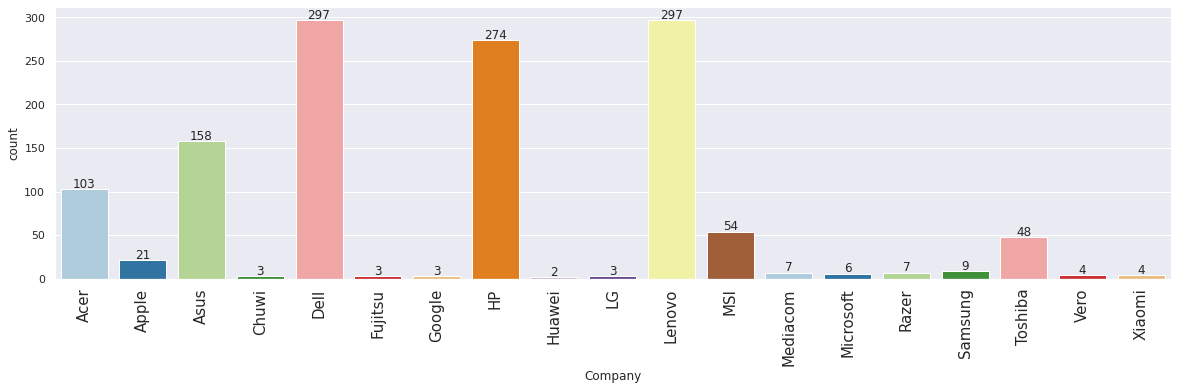

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(df, "Company")

### HP, Dell, and Lenovo have the highest number of available laptops.

### Q. How does the price vary across the different companies manufacturing laptops?

In [23]:
df.groupby("Company")["Price_euros"].mean()

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

<IPython.core.display.Javascript object>

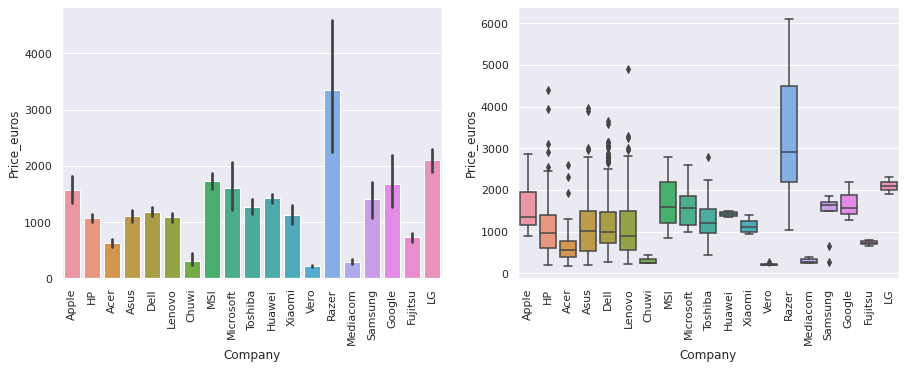

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="Price_euros", x="Company")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="Price_euros", x="Company")
plt.xticks(rotation=90)

plt.show()

### Asus, Dell, Lenovo, and HP offer laptops at competitive prices. Apple and MSI laptops are slightly higher priced, while Acer laptops are cheaper. Laptops manufactured by Razer are the most expensive in general.

### Q. How does the price vary across the different types of laptops?

In [27]:
df.groupby("TypeName")["Price_euros"].mean().sort_values(ascending=False)

TypeName
Workstation           2280.358966
Gaming                1731.380634
Ultrabook             1548.230357
2 in 1 Convertible    1282.401653
Notebook               782.078624
Netbook                636.232000
Name: Price_euros, dtype: float64

<IPython.core.display.Javascript object>

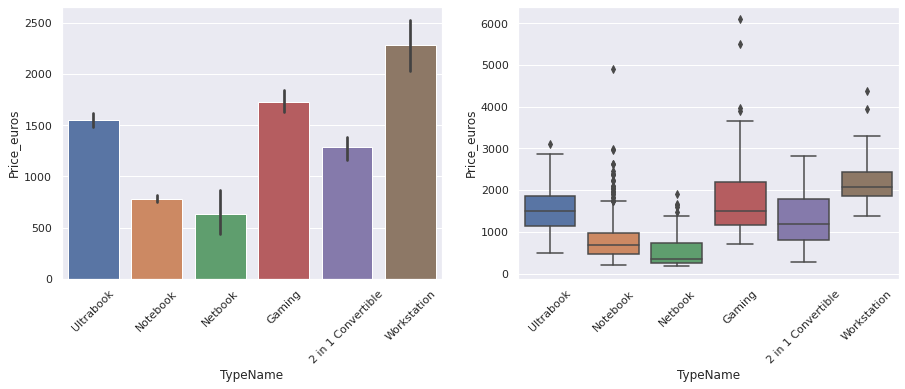

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="Price_euros", x="TypeName")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="Price_euros", x="TypeName")
plt.xticks(rotation=45)

plt.show()

### Gamings laptops and workstations are the most expensive types of laptops on average, while Notebooks and Netbooks are the cheapest.

In [29]:
# let's create a copy of our data
df1 = df.copy()

<IPython.core.display.Javascript object>

### Q. The amount of RAM available is a key factor in gaming performance. How does the amount of RAM vary by the company for Gaming laptops?

In [30]:
df1.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


<IPython.core.display.Javascript object>

In [31]:
# defining a function to extract the amount of RAM


def ram_to_num(ram_val):
    """
    This function takes in a string representing the amount of RAM
    and converts it to a number. For example, '8GB' becomes 8.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan.
    """
    if isinstance(ram_val, str):  # checks if 'ram_val' is a string
        if ram_val.endswith("GB"):
            return float(ram_val.replace("GB", ""))
        elif ram_val.endswith("MB"):
            return (
                float(ram_val.replace("MB", "")) / 1024
            )  # converting MB to GB by dividing by 1024
    else:  # this happens when the current ram is np.nan
        return np.nan

<IPython.core.display.Javascript object>

In [32]:
# extract the amount of RAM
df1["RAM_GB"] = df1["Ram"].apply(ram_to_num)
df1[["RAM_GB", "Ram"]].head()

,RAM_GB,Ram
0,8.0,8GB
1,8.0,8GB
2,8.0,8GB
3,16.0,16GB
4,8.0,8GB


<IPython.core.display.Javascript object>

In [33]:
df1.drop("Ram", axis=1, inplace=True)
df1["RAM_GB"].describe()

count    1303.000000
mean        8.382195
std         5.084665
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        64.000000
Name: RAM_GB, dtype: float64

<IPython.core.display.Javascript object>

In [36]:
df_gaming = df1[df1.TypeName == "Gaming"]
df_gaming.groupby("Company")["RAM_GB"].mean().sort_values(ascending=False)

Company
Razer     22.400000
Dell      15.800000
Asus      14.962963
MSI       13.037037
Lenovo    12.375000
Acer      12.000000
HP        11.000000
Name: RAM_GB, dtype: float64

<IPython.core.display.Javascript object>

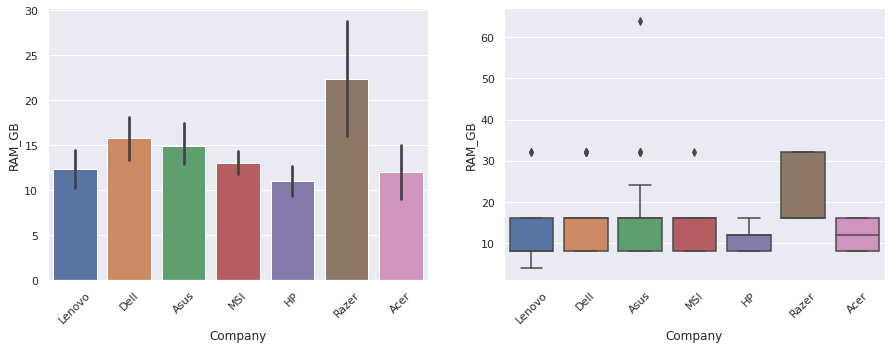

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_gaming, y="RAM_GB", x="Company")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_gaming, y="RAM_GB", x="Company")
plt.xticks(rotation=45)

plt.show()

### Razer provides the highest amount of RAM on an average for Gaming laptops.

### Q. GPUs are a key component for users interested in gaming, and Nvidia is one of the leading manufacturers of GPUs. How does the price vary by the company for Gaming laptops with an Nvidia GeForce GTX GPU?

In [38]:
# we create a new column to indicate if a laptop has the NVIDIA Geforce GTX GPU
df1["GPU_Nvidia_GTX"] = [
    1 if "Nvidia GeForce GTX" in item else 0 for item in df1["Gpu"].values
]
df1["GPU_Nvidia_GTX"].value_counts()

0    1065
1     238
Name: GPU_Nvidia_GTX, dtype: int64

<IPython.core.display.Javascript object>

In [40]:
df_gaming_nvidia = df1[(df1.TypeName == "Gaming") & (df1.GPU_Nvidia_GTX == 1)]
df_gaming_nvidia.groupby("Company")["Price_euros"].mean().sort_values(ascending=False)

Company
Razer     4119.000000
Dell      1918.393000
Asus      1743.658980
MSI       1708.717736
Acer      1468.125000
HP        1394.545455
Lenovo    1339.612258
Name: Price_euros, dtype: float64

<IPython.core.display.Javascript object>

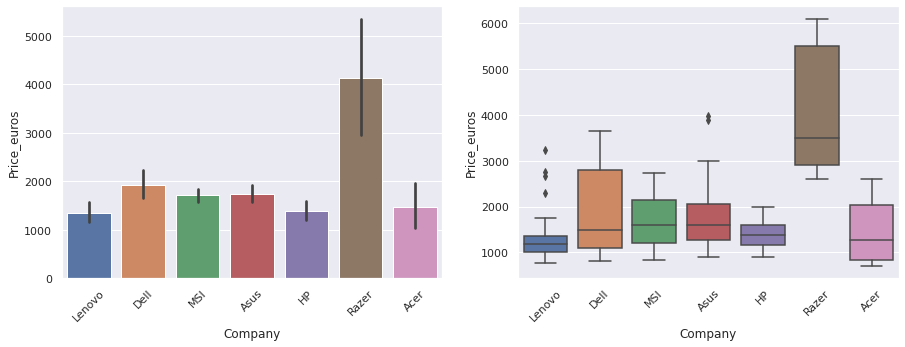

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_gaming_nvidia, y="Price_euros", x="Company")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_gaming_nvidia, y="Price_euros", x="Company")
plt.xticks(rotation=45)

plt.show()

### Lenovo and Acer provide gaming laptops with an Nvidia GeForce GTX GPU at comparatively cheaper prices.

### Q. It has been found from sales history that executives prefer fast and lightweight laptops, and Ultrabooks are one of the best choices for them. How does the weight of laptops of type Ultrabook differ by the company?

In [42]:
# checking the units of weight
weight_units = list(set([item[-2:] for item in df1.Weight]))
weight_units

['kg']

<IPython.core.display.Javascript object>

All laptops in the data have weight in kilograms.

In [43]:
# removing the units and converting to float
df1["Weight_kg"] = df1["Weight"].str.replace("kg", "").astype(float)
df1.drop("Weight", axis=1, inplace=True)
df1["Weight_kg"].describe()

count    1303.000000
mean        2.038734
std         0.665475
min         0.690000
25%         1.500000
50%         2.040000
75%         2.300000
max         4.700000
Name: Weight_kg, dtype: float64

<IPython.core.display.Javascript object>

In [45]:
df_ultrabook = df1[df1.TypeName == "Ultrabook"]
df_ultrabook.groupby("Company")["Weight_kg"].mean().sort_values(ascending=True)

Company
Huawei       1.050000
LG           1.050000
Samsung      1.066000
Google       1.100000
Toshiba      1.232500
Microsoft    1.251333
Razer        1.270000
Xiaomi       1.290000
Apple        1.320476
Asus         1.322000
Lenovo       1.376774
Dell         1.381837
HP           1.424722
Acer         1.530000
Name: Weight_kg, dtype: float64

<IPython.core.display.Javascript object>

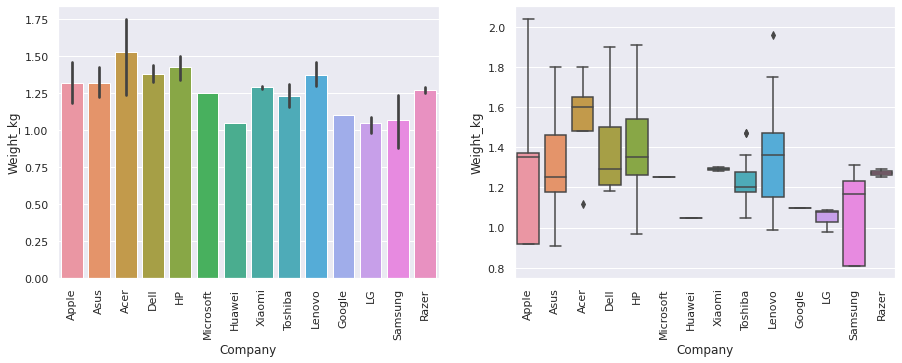

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_ultrabook, y="Weight_kg", x="Company")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_ultrabook, y="Weight_kg", x="Company")
plt.xticks(rotation=90)

plt.show()

### Apple, Samsung, Huawei, and LG provide the lightest Ultrabooks. A few Samsung and Apple laptops weigh less than a kilogram.

### Q. The sales history also shows that executives have a preference for small laptops running on Windows OS for ease of use. How many laptops running on Windows OS have a screen size not greater than 14 inches are available across different companies?

In [47]:
df1.OpSys.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

<IPython.core.display.Javascript object>

In [48]:
df1["OS"] = df1["OpSys"].str.split(" ").str[0]
df1["OS"].value_counts()

Windows    1125
No           66
Linux        62
Chrome       27
macOS        13
Mac           8
Android       2
Name: OS, dtype: int64

<IPython.core.display.Javascript object>

In [49]:
df1["OS"] = [
    "NA" if item == "No" else "MacOS" if item.lower().startswith("mac") else item
    for item in df1.OS.values
]
df1["OS"].value_counts()

Windows    1125
NA           66
Linux        62
Chrome       27
MacOS        21
Android       2
Name: OS, dtype: int64

<IPython.core.display.Javascript object>

In [50]:
df_win_small = df1[(df1.OS == "Windows") & (df1.Inches <= 14)]
df_win_small.Company.value_counts()

Lenovo       114
HP           104
Dell          77
Asus          38
Toshiba       29
Acer          20
Mediacom       7
Microsoft      6
Razer          5
Vero           4
Samsung        3
Huawei         2
MSI            2
Chuwi          1
Xiaomi         1
LG             1
Name: Company, dtype: int64

<IPython.core.display.Javascript object>

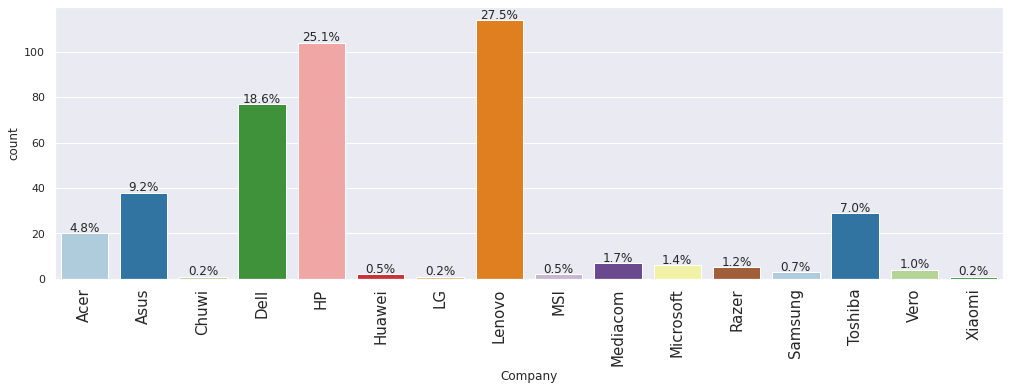

<IPython.core.display.Javascript object>

In [51]:
labeled_barplot(df_win_small, "Company", perc=True)

### Lenovo and HP manufacturer around 52% of the laptops running on Windows OS with a screen size less than 15 inches.

### Q. Operating systems like Linux and ChromeOS are not so common, and the sales history shows that the number of customers buying laptops running on these operating systems is limited. How many laptops across different companies run on a Linux or Chrome operating system?

In [52]:
df_linux_chrome = df1[(df1.OS == "Linux") | (df1.OS == "Chrome")]
df_linux_chrome.shape[0]

89

<IPython.core.display.Javascript object>

In [53]:
df_linux_chrome.groupby(["OS", "Company"]).Product.count()

OS      Company
Chrome  Acer       11
        Asus        3
        Dell        1
        Google      3
        HP          4
        Lenovo      3
        Samsung     2
Linux   Acer       16
        Asus       10
        Dell       36
Name: Product, dtype: int64

<IPython.core.display.Javascript object>

(array([0, 1]), [Text(0, 0, 'Linux'), Text(1, 0, 'Chrome')])

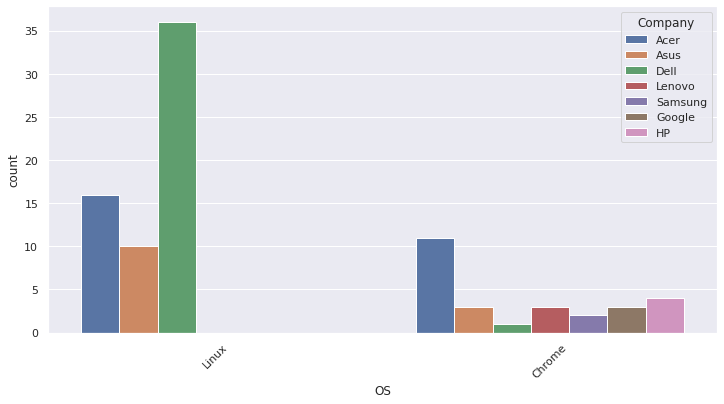

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_linux_chrome, x="OS", hue="Company")
plt.xticks(rotation=45)

### Dell has the highest number of laptops running on Linux, while Acer has the highest number of laptops running on ChromeOS.

### Q. High-resolution screens are good to have in laptops for entertainment purposes. How many laptops are available for different companies with screen resolutions better than 1600x900?

In [55]:
# extract the screen resolution
df1["ScrRes"] = df1["ScreenResolution"].str.split(" ").str[-1]
df1[["ScrRes", "ScreenResolution"]].head()

,ScrRes,ScreenResolution
0,2560x1600,IPS Panel Retina Display 2560x1600
1,1440x900,1440x900
2,1920x1080,Full HD 1920x1080
3,2880x1800,IPS Panel Retina Display 2880x1800
4,2560x1600,IPS Panel Retina Display 2560x1600


<IPython.core.display.Javascript object>

In [56]:
df1.drop("ScreenResolution", axis=1, inplace=True)
df1.ScrRes.value_counts()

1920x1080    841
1366x768     308
3840x2160     43
3200x1800     27
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: ScrRes, dtype: int64

<IPython.core.display.Javascript object>

In [57]:
df1["ScrRes_C1"] = df1.ScrRes.str[:4].astype(float)
df1["ScrRes_C1"].describe()

count    1303.000000
mean     1894.784344
std       494.641028
min      1366.000000
25%      1600.000000
50%      1920.000000
75%      1920.000000
max      3840.000000
Name: ScrRes_C1, dtype: float64

<IPython.core.display.Javascript object>

In [58]:
df_highres = df1[df1.ScrRes_C1 > 1600]
df_highres.Company.value_counts()

Lenovo       231
Dell         226
HP           195
Asus         116
MSI           54
Acer          51
Toshiba       33
Apple         16
Samsung        8
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Google         3
LG             3
Vero           3
Chuwi          3
Huawei         2
Name: Company, dtype: int64

<IPython.core.display.Javascript object>

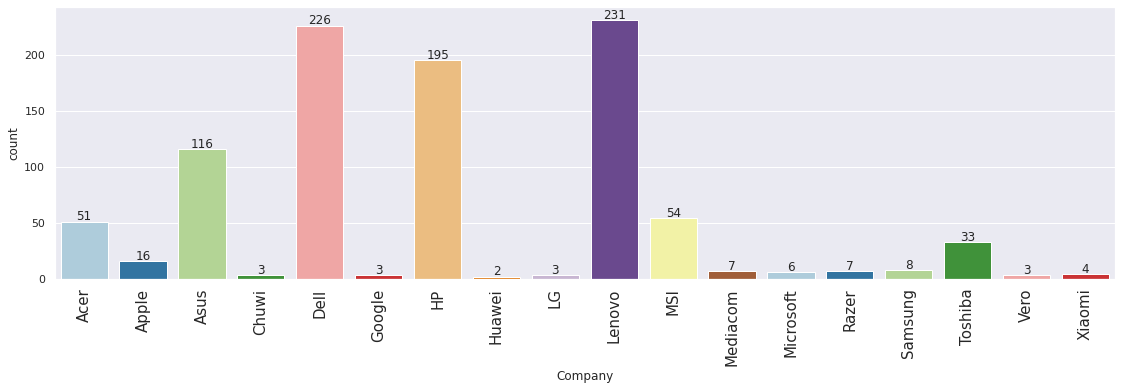

<IPython.core.display.Javascript object>

In [59]:
labeled_barplot(df_highres, "Company")

### HP, Dell, and Lenovo provide more options in terms of laptops having higher screen resolutions.

### Q. What percentage of laptops in each company have high-resolution screens?

In [60]:
df_highres.Company.unique()

array(['Apple', 'HP', 'Asus', 'Acer', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Huawei', 'Xiaomi', 'Vero', 'Razer', 'Toshiba',
       'Mediacom', 'Google', 'Samsung', 'LG'], dtype=object)

<IPython.core.display.Javascript object>

In [61]:
df.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

<IPython.core.display.Javascript object>

In [62]:
# let us compute the percentage of laptops in each company having high resolution screens
df_highres.Company.value_counts() / df[df.Company != "Fujitsu"].Company.value_counts()

Acer         0.495146
Apple        0.761905
Asus         0.734177
Chuwi        1.000000
Dell         0.760943
Google       1.000000
HP           0.711679
Huawei       1.000000
LG           1.000000
Lenovo       0.777778
MSI          1.000000
Mediacom     1.000000
Microsoft    1.000000
Razer        1.000000
Samsung      0.888889
Toshiba      0.687500
Vero         0.750000
Xiaomi       1.000000
Name: Company, dtype: float64

<IPython.core.display.Javascript object>

### Many companies manufacture laptops with high-resolution screens only. Fujitsu does not manufacture laptops with high-resolution screens.

### Q. Intel and AMD are primary manufacturers of processors. How does the speed of processing vary between these two processor manufacturers for laptops of type Notebook?

In [63]:
df1.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,RAM_GB,GPU_Nvidia_GTX,Weight_kg,OS,ScrRes,ScrRes_C1
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69,8.0,0,1.37,MacOS,2560x1600,2560.0
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94,8.0,0,1.34,MacOS,1440x900,1440.0
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,575.00,8.0,0,1.86,NA,1920x1080,1920.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,2537.45,16.0,0,1.83,MacOS,2880x1800,2880.0
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60,8.0,0,1.37,MacOS,2560x1600,2560.0


<IPython.core.display.Javascript object>

In [64]:
df1["CPU_mnfc"] = df1.Cpu.str.split().str[0]
df1["CPU_speed"] = df1.Cpu.str.split().str[-1]

<IPython.core.display.Javascript object>

In [65]:
df1.CPU_mnfc.value_counts()

Intel      1240
AMD          62
Samsung       1
Name: CPU_mnfc, dtype: int64

<IPython.core.display.Javascript object>

In [66]:
# checking the units of CPU speed
cpu_units = list(set([item[-3:] for item in df1.CPU_speed]))
cpu_units

['GHz']

<IPython.core.display.Javascript object>

In [67]:
# extract the amount of RAM
df1["CPU_speed"] = df1["CPU_speed"].str.replace("GHz", "").astype(float)
df1[["CPU_speed", "Cpu"]].head()

,CPU_speed,Cpu
0,2.3,Intel Core i5 2.3GHz
1,1.8,Intel Core i5 1.8GHz
2,2.5,Intel Core i5 7200U 2.5GHz
3,2.7,Intel Core i7 2.7GHz
4,3.1,Intel Core i5 3.1GHz


<IPython.core.display.Javascript object>

In [68]:
df_notebook = df1[df1.TypeName == "Notebook"]
df_notebook.groupby("CPU_mnfc")["CPU_speed"].mean()

CPU_mnfc
AMD      2.585455
Intel    2.184077
Name: CPU_speed, dtype: float64

<IPython.core.display.Javascript object>

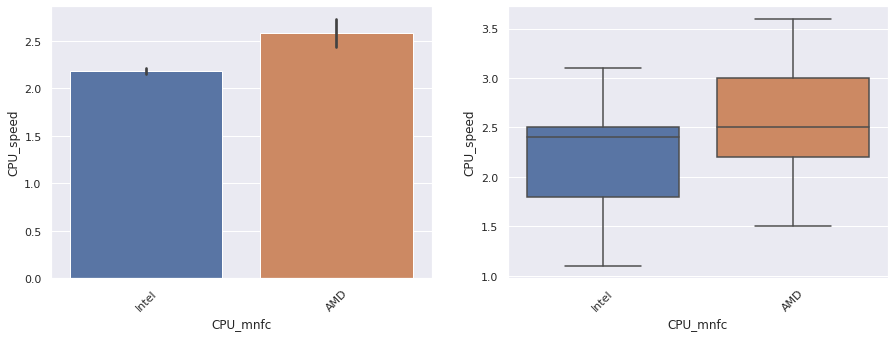

<IPython.core.display.Javascript object>

In [69]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_notebook, y="CPU_speed", x="CPU_mnfc")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_notebook, y="CPU_speed", x="CPU_mnfc")
plt.xticks(rotation=45)

plt.show()

### AMD processors tend to offer more processing speed than Intel processors.

### Q. Many recent laptops have started to provide multiple storage options (like an SSD with an HDD). What are the different kinds of storage available for laptops manufactured by Apple? (Refer to the '*Memory*' column)

In [70]:
np.random.seed(2)
df1.sample(10)

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,RAM_GB,GPU_Nvidia_GTX,Weight_kg,OS,ScrRes,ScrRes_C1,CPU_mnfc,CPU_speed
248,253,HP,ProBook 430,Notebook,13.3,Intel Core i5 8250U 1.6GHz,500GB HDD,Intel UHD Graphics 620,Windows 10,675.0,4.0,0,1.49,Windows,1920x1080,1920.0,Intel,1.60
556,563,Mediacom,SmartBook 130,Notebook,13.3,Intel Atom x5-Z8350 1.44GHz,32GB Flash Storage,Intel HD Graphics,Windows 10,255.0,4.0,0,1.35,Windows,1920x1080,1920.0,Intel,1.44
693,701,Lenovo,ThinkPad X1,2 in 1 Convertible,14.0,Intel Core i7 7500U 2.7GHz,256GB SSD,Intel HD Graphics 620,Windows 10,2590.0,8.0,0,1.42,Windows,2560x1440,2560.0,Intel,2.70
387,393,Dell,Precision 3510,Workstation,15.6,Intel Core i5 6440HQ 2.6GHz,500GB HDD,AMD FirePro W5130M,Windows 10,1369.0,8.0,0,2.23,Windows,1920x1080,1920.0,Intel,2.60
781,790,Asus,Rog G752VS-BA171T,Gaming,17.3,Intel Core i7 6700HQ 2.6GHz,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2350.0,16.0,1,4.30,Windows,1920x1080,1920.0,Intel,2.60
379,385,Acer,Aspire 7,Notebook,15.6,Intel Core i7 7700HQ 2.8GHz,1TB HDD,Nvidia GeForce GTX 1050,Linux,846.0,8.0,1,2.40,Linux,1920x1080,1920.0,Intel,2.80
716,724,Dell,Latitude 5580,Notebook,15.6,Intel Core i5 7300U 2.6GHz,256GB SSD,Intel HD Graphics 620,Windows 10,1179.0,8.0,0,1.90,Windows,1920x1080,1920.0,Intel,2.60
880,891,HP,EliteBook x360,2 in 1 Convertible,13.3,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,Windows 10,1700.0,4.0,0,1.28,Windows,1920x1080,1920.0,Intel,2.50
654,662,HP,250 G6,Notebook,15.6,Intel Core i3 6006U 2GHz,500GB HDD,Intel HD Graphics 520,No OS,364.9,4.0,0,1.86,NA,1366x768,1366.0,Intel,2.00
994,1008,Dell,Inspiron 5378,2 in 1 Convertible,13.3,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,Windows 10,889.0,8.0,0,1.68,Windows,1920x1080,1920.0,Intel,2.50


<IPython.core.display.Javascript object>

In [71]:
df1["Memory"] = [
    item + " + NaN" if "+" not in item else item for item in df1["Memory"].values
]
df1.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,RAM_GB,GPU_Nvidia_GTX,Weight_kg,OS,ScrRes,ScrRes_C1,CPU_mnfc,CPU_speed
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,128GB SSD + NaN,Intel Iris Plus Graphics 640,macOS,1339.69,8.0,0,1.37,MacOS,2560x1600,2560.0,Intel,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,128GB Flash Storage + NaN,Intel HD Graphics 6000,macOS,898.94,8.0,0,1.34,MacOS,1440x900,1440.0,Intel,1.8
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,256GB SSD + NaN,Intel HD Graphics 620,No OS,575.00,8.0,0,1.86,NA,1920x1080,1920.0,Intel,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,512GB SSD + NaN,AMD Radeon Pro 455,macOS,2537.45,16.0,0,1.83,MacOS,2880x1800,2880.0,Intel,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,256GB SSD + NaN,Intel Iris Plus Graphics 650,macOS,1803.60,8.0,0,1.37,MacOS,2560x1600,2560.0,Intel,3.1


<IPython.core.display.Javascript object>

In [72]:
df1["Storage1"] = df1["Memory"].str.split("+").str[0].str.strip()
df1["Storage2"] = df1["Memory"].str.split("+").str[1].str.strip()
df1.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,RAM_GB,GPU_Nvidia_GTX,Weight_kg,OS,ScrRes,ScrRes_C1,CPU_mnfc,CPU_speed,Storage1,Storage2
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,128GB SSD + NaN,Intel Iris Plus Graphics 640,macOS,1339.69,8.0,0,1.37,MacOS,2560x1600,2560.0,Intel,2.3,128GB SSD,NaN
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,128GB Flash Storage + NaN,Intel HD Graphics 6000,macOS,898.94,8.0,0,1.34,MacOS,1440x900,1440.0,Intel,1.8,128GB Flash Storage,NaN
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,256GB SSD + NaN,Intel HD Graphics 620,No OS,575.00,8.0,0,1.86,NA,1920x1080,1920.0,Intel,2.5,256GB SSD,NaN
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,512GB SSD + NaN,AMD Radeon Pro 455,macOS,2537.45,16.0,0,1.83,MacOS,2880x1800,2880.0,Intel,2.7,512GB SSD,NaN
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,256GB SSD + NaN,Intel Iris Plus Graphics 650,macOS,1803.60,8.0,0,1.37,MacOS,2560x1600,2560.0,Intel,3.1,256GB SSD,NaN


<IPython.core.display.Javascript object>

In [73]:
np.random.seed(2)
df1.sample(10)

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,RAM_GB,GPU_Nvidia_GTX,Weight_kg,OS,ScrRes,ScrRes_C1,CPU_mnfc,CPU_speed,Storage1,Storage2
248,253,HP,ProBook 430,Notebook,13.3,Intel Core i5 8250U 1.6GHz,500GB HDD + NaN,Intel UHD Graphics 620,Windows 10,675.0,4.0,0,1.49,Windows,1920x1080,1920.0,Intel,1.60,500GB HDD,NaN
556,563,Mediacom,SmartBook 130,Notebook,13.3,Intel Atom x5-Z8350 1.44GHz,32GB Flash Storage + NaN,Intel HD Graphics,Windows 10,255.0,4.0,0,1.35,Windows,1920x1080,1920.0,Intel,1.44,32GB Flash Storage,NaN
693,701,Lenovo,ThinkPad X1,2 in 1 Convertible,14.0,Intel Core i7 7500U 2.7GHz,256GB SSD + NaN,Intel HD Graphics 620,Windows 10,2590.0,8.0,0,1.42,Windows,2560x1440,2560.0,Intel,2.70,256GB SSD,NaN
387,393,Dell,Precision 3510,Workstation,15.6,Intel Core i5 6440HQ 2.6GHz,500GB HDD + NaN,AMD FirePro W5130M,Windows 10,1369.0,8.0,0,2.23,Windows,1920x1080,1920.0,Intel,2.60,500GB HDD,NaN
781,790,Asus,Rog G752VS-BA171T,Gaming,17.3,Intel Core i7 6700HQ 2.6GHz,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2350.0,16.0,1,4.30,Windows,1920x1080,1920.0,Intel,2.60,256GB SSD,1TB HDD
379,385,Acer,Aspire 7,Notebook,15.6,Intel Core i7 7700HQ 2.8GHz,1TB HDD + NaN,Nvidia GeForce GTX 1050,Linux,846.0,8.0,1,2.40,Linux,1920x1080,1920.0,Intel,2.80,1TB HDD,NaN
716,724,Dell,Latitude 5580,Notebook,15.6,Intel Core i5 7300U 2.6GHz,256GB SSD + NaN,Intel HD Graphics 620,Windows 10,1179.0,8.0,0,1.90,Windows,1920x1080,1920.0,Intel,2.60,256GB SSD,NaN
880,891,HP,EliteBook x360,2 in 1 Convertible,13.3,Intel Core i5 7200U 2.5GHz,256GB SSD + NaN,Intel HD Graphics 620,Windows 10,1700.0,4.0,0,1.28,Windows,1920x1080,1920.0,Intel,2.50,256GB SSD,NaN
654,662,HP,250 G6,Notebook,15.6,Intel Core i3 6006U 2GHz,500GB HDD + NaN,Intel HD Graphics 520,No OS,364.9,4.0,0,1.86,NA,1366x768,1366.0,Intel,2.00,500GB HDD,NaN
994,1008,Dell,Inspiron 5378,2 in 1 Convertible,13.3,Intel Core i5 7200U 2.5GHz,256GB SSD + NaN,Intel HD Graphics 620,Windows 10,889.0,8.0,0,1.68,Windows,1920x1080,1920.0,Intel,2.50,256GB SSD,NaN


<IPython.core.display.Javascript object>

In [74]:
df1["Storage1_Type"] = df1["Storage1"].str.split(" ").str[1]
df1["Storage1_Volume"] = df1["Storage1"].str.split(" ").str[0]

df1["Storage2_Type"] = df1["Storage2"].str.split(" ").str[1]
df1["Storage2_Volume"] = df1["Storage2"].str.split(" ").str[0]

df1.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,RAM_GB,GPU_Nvidia_GTX,Weight_kg,OS,ScrRes,ScrRes_C1,CPU_mnfc,CPU_speed,Storage1,Storage2,Storage1_Type,Storage1_Volume,Storage2_Type,Storage2_Volume
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,128GB SSD + NaN,Intel Iris Plus Graphics 640,macOS,1339.69,8.0,0,1.37,MacOS,2560x1600,2560.0,Intel,2.3,128GB SSD,NaN,SSD,128GB,NaN,NaN
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,128GB Flash Storage + NaN,Intel HD Graphics 6000,macOS,898.94,8.0,0,1.34,MacOS,1440x900,1440.0,Intel,1.8,128GB Flash Storage,NaN,Flash,128GB,NaN,NaN
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,256GB SSD + NaN,Intel HD Graphics 620,No OS,575.00,8.0,0,1.86,NA,1920x1080,1920.0,Intel,2.5,256GB SSD,NaN,SSD,256GB,NaN,NaN
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,512GB SSD + NaN,AMD Radeon Pro 455,macOS,2537.45,16.0,0,1.83,MacOS,2880x1800,2880.0,Intel,2.7,512GB SSD,NaN,SSD,512GB,NaN,NaN
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,256GB SSD + NaN,Intel Iris Plus Graphics 650,macOS,1803.60,8.0,0,1.37,MacOS,2560x1600,2560.0,Intel,3.1,256GB SSD,NaN,SSD,256GB,NaN,NaN


<IPython.core.display.Javascript object>

In [75]:
np.random.seed(2)
df1.sample(10)

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,RAM_GB,GPU_Nvidia_GTX,Weight_kg,OS,ScrRes,ScrRes_C1,CPU_mnfc,CPU_speed,Storage1,Storage2,Storage1_Type,Storage1_Volume,Storage2_Type,Storage2_Volume
248,253,HP,ProBook 430,Notebook,13.3,Intel Core i5 8250U 1.6GHz,500GB HDD + NaN,Intel UHD Graphics 620,Windows 10,675.0,4.0,0,1.49,Windows,1920x1080,1920.0,Intel,1.60,500GB HDD,NaN,HDD,500GB,NaN,NaN
556,563,Mediacom,SmartBook 130,Notebook,13.3,Intel Atom x5-Z8350 1.44GHz,32GB Flash Storage + NaN,Intel HD Graphics,Windows 10,255.0,4.0,0,1.35,Windows,1920x1080,1920.0,Intel,1.44,32GB Flash Storage,NaN,Flash,32GB,NaN,NaN
693,701,Lenovo,ThinkPad X1,2 in 1 Convertible,14.0,Intel Core i7 7500U 2.7GHz,256GB SSD + NaN,Intel HD Graphics 620,Windows 10,2590.0,8.0,0,1.42,Windows,2560x1440,2560.0,Intel,2.70,256GB SSD,NaN,SSD,256GB,NaN,NaN
387,393,Dell,Precision 3510,Workstation,15.6,Intel Core i5 6440HQ 2.6GHz,500GB HDD + NaN,AMD FirePro W5130M,Windows 10,1369.0,8.0,0,2.23,Windows,1920x1080,1920.0,Intel,2.60,500GB HDD,NaN,HDD,500GB,NaN,NaN
781,790,Asus,Rog G752VS-BA171T,Gaming,17.3,Intel Core i7 6700HQ 2.6GHz,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2350.0,16.0,1,4.30,Windows,1920x1080,1920.0,Intel,2.60,256GB SSD,1TB HDD,SSD,256GB,HDD,1TB
379,385,Acer,Aspire 7,Notebook,15.6,Intel Core i7 7700HQ 2.8GHz,1TB HDD + NaN,Nvidia GeForce GTX 1050,Linux,846.0,8.0,1,2.40,Linux,1920x1080,1920.0,Intel,2.80,1TB HDD,NaN,HDD,1TB,NaN,NaN
716,724,Dell,Latitude 5580,Notebook,15.6,Intel Core i5 7300U 2.6GHz,256GB SSD + NaN,Intel HD Graphics 620,Windows 10,1179.0,8.0,0,1.90,Windows,1920x1080,1920.0,Intel,2.60,256GB SSD,NaN,SSD,256GB,NaN,NaN
880,891,HP,EliteBook x360,2 in 1 Convertible,13.3,Intel Core i5 7200U 2.5GHz,256GB SSD + NaN,Intel HD Graphics 620,Windows 10,1700.0,4.0,0,1.28,Windows,1920x1080,1920.0,Intel,2.50,256GB SSD,NaN,SSD,256GB,NaN,NaN
654,662,HP,250 G6,Notebook,15.6,Intel Core i3 6006U 2GHz,500GB HDD + NaN,Intel HD Graphics 520,No OS,364.9,4.0,0,1.86,NA,1366x768,1366.0,Intel,2.00,500GB HDD,NaN,HDD,500GB,NaN,NaN
994,1008,Dell,Inspiron 5378,2 in 1 Convertible,13.3,Intel Core i5 7200U 2.5GHz,256GB SSD + NaN,Intel HD Graphics 620,Windows 10,889.0,8.0,0,1.68,Windows,1920x1080,1920.0,Intel,2.50,256GB SSD,NaN,SSD,256GB,NaN,NaN


<IPython.core.display.Javascript object>

In [76]:
def storage_volume_to_num(str_vol_val):
    """This function takes in a string representing the volume of a storage device
    and converts it to a number.
    For example, '256GB' becomes 256.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(str_vol_val, str):  # checks if `str_vol_val` is a string
        multiplier = 1  # handles GB vs TB
        if str_vol_val.endswith("TB"):
            multiplier = 1024
        return float(str_vol_val.replace("GB", "").replace("TB", "")) * multiplier
    else:  # this happens when the str_vol is np.nan
        return np.nan

<IPython.core.display.Javascript object>

In [77]:
df1["Storage1_Volume"] = df1["Storage1_Volume"].apply(storage_volume_to_num)
df1["Storage2_Volume"] = df1["Storage2_Volume"].apply(storage_volume_to_num)

df1.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,RAM_GB,GPU_Nvidia_GTX,Weight_kg,OS,ScrRes,ScrRes_C1,CPU_mnfc,CPU_speed,Storage1,Storage2,Storage1_Type,Storage1_Volume,Storage2_Type,Storage2_Volume
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,128GB SSD + NaN,Intel Iris Plus Graphics 640,macOS,1339.69,8.0,0,1.37,MacOS,2560x1600,2560.0,Intel,2.3,128GB SSD,NaN,SSD,128.0,NaN,NaN
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,128GB Flash Storage + NaN,Intel HD Graphics 6000,macOS,898.94,8.0,0,1.34,MacOS,1440x900,1440.0,Intel,1.8,128GB Flash Storage,NaN,Flash,128.0,NaN,NaN
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,256GB SSD + NaN,Intel HD Graphics 620,No OS,575.00,8.0,0,1.86,NA,1920x1080,1920.0,Intel,2.5,256GB SSD,NaN,SSD,256.0,NaN,NaN
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,512GB SSD + NaN,AMD Radeon Pro 455,macOS,2537.45,16.0,0,1.83,MacOS,2880x1800,2880.0,Intel,2.7,512GB SSD,NaN,SSD,512.0,NaN,NaN
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,256GB SSD + NaN,Intel Iris Plus Graphics 650,macOS,1803.60,8.0,0,1.37,MacOS,2560x1600,2560.0,Intel,3.1,256GB SSD,NaN,SSD,256.0,NaN,NaN


<IPython.core.display.Javascript object>

In [78]:
np.random.seed(2)
df1.sample(10)

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,RAM_GB,GPU_Nvidia_GTX,Weight_kg,OS,ScrRes,ScrRes_C1,CPU_mnfc,CPU_speed,Storage1,Storage2,Storage1_Type,Storage1_Volume,Storage2_Type,Storage2_Volume
248,253,HP,ProBook 430,Notebook,13.3,Intel Core i5 8250U 1.6GHz,500GB HDD + NaN,Intel UHD Graphics 620,Windows 10,675.0,4.0,0,1.49,Windows,1920x1080,1920.0,Intel,1.60,500GB HDD,NaN,HDD,500.0,NaN,NaN
556,563,Mediacom,SmartBook 130,Notebook,13.3,Intel Atom x5-Z8350 1.44GHz,32GB Flash Storage + NaN,Intel HD Graphics,Windows 10,255.0,4.0,0,1.35,Windows,1920x1080,1920.0,Intel,1.44,32GB Flash Storage,NaN,Flash,32.0,NaN,NaN
693,701,Lenovo,ThinkPad X1,2 in 1 Convertible,14.0,Intel Core i7 7500U 2.7GHz,256GB SSD + NaN,Intel HD Graphics 620,Windows 10,2590.0,8.0,0,1.42,Windows,2560x1440,2560.0,Intel,2.70,256GB SSD,NaN,SSD,256.0,NaN,NaN
387,393,Dell,Precision 3510,Workstation,15.6,Intel Core i5 6440HQ 2.6GHz,500GB HDD + NaN,AMD FirePro W5130M,Windows 10,1369.0,8.0,0,2.23,Windows,1920x1080,1920.0,Intel,2.60,500GB HDD,NaN,HDD,500.0,NaN,NaN
781,790,Asus,Rog G752VS-BA171T,Gaming,17.3,Intel Core i7 6700HQ 2.6GHz,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2350.0,16.0,1,4.30,Windows,1920x1080,1920.0,Intel,2.60,256GB SSD,1TB HDD,SSD,256.0,HDD,1024.0
379,385,Acer,Aspire 7,Notebook,15.6,Intel Core i7 7700HQ 2.8GHz,1TB HDD + NaN,Nvidia GeForce GTX 1050,Linux,846.0,8.0,1,2.40,Linux,1920x1080,1920.0,Intel,2.80,1TB HDD,NaN,HDD,1024.0,NaN,NaN
716,724,Dell,Latitude 5580,Notebook,15.6,Intel Core i5 7300U 2.6GHz,256GB SSD + NaN,Intel HD Graphics 620,Windows 10,1179.0,8.0,0,1.90,Windows,1920x1080,1920.0,Intel,2.60,256GB SSD,NaN,SSD,256.0,NaN,NaN
880,891,HP,EliteBook x360,2 in 1 Convertible,13.3,Intel Core i5 7200U 2.5GHz,256GB SSD + NaN,Intel HD Graphics 620,Windows 10,1700.0,4.0,0,1.28,Windows,1920x1080,1920.0,Intel,2.50,256GB SSD,NaN,SSD,256.0,NaN,NaN
654,662,HP,250 G6,Notebook,15.6,Intel Core i3 6006U 2GHz,500GB HDD + NaN,Intel HD Graphics 520,No OS,364.9,4.0,0,1.86,NA,1366x768,1366.0,Intel,2.00,500GB HDD,NaN,HDD,500.0,NaN,NaN
994,1008,Dell,Inspiron 5378,2 in 1 Convertible,13.3,Intel Core i5 7200U 2.5GHz,256GB SSD + NaN,Intel HD Graphics 620,Windows 10,889.0,8.0,0,1.68,Windows,1920x1080,1920.0,Intel,2.50,256GB SSD,NaN,SSD,256.0,NaN,NaN


<IPython.core.display.Javascript object>

In [79]:
df_apple = df1[df1.Company == "Apple"]
df_apple[["Storage1_Volume", "Storage2_Volume"]].describe()

,Storage1_Volume,Storage2_Volume
count,21.000000,0.0
mean,323.047619,NaN
std,143.788204,NaN
min,128.000000,NaN
25%,256.000000,NaN
50%,256.000000,NaN
75%,512.000000,NaN
max,512.000000,NaN


<IPython.core.display.Javascript object>

In [80]:
df_apple["Storage1_Type"].value_counts()

SSD      11
Flash    10
Name: Storage1_Type, dtype: int64

<IPython.core.display.Javascript object>

In [81]:
df_apple["Storage2_Type"].value_counts()

Series([], Name: Storage2_Type, dtype: int64)

<IPython.core.display.Javascript object>

### Apple provides either an SSD or Flash Storage, with a median storage memory of 256GB. No secondary storage options are provided.